# 0. Import dependencies

Importing libraries required for analysis.

In [150]:
# import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Importing data from the `data.csv` file and dropping redundant columns.

In [134]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df


,Store 1 - Entry,Store 2 - Entry,Store 3 - Entry,Store 1 - Exit,Store 2 - Exit,Store 3 - Exit,Main Gate - Entry,Main Gate - Exit
0,0,0,1,-1,0,-1,1,-2
1,0,0,1,0,0,0,1,0
2,0,0,0,-1,0,0,0,-1
3,0,1,0,0,0,-1,1,-1
4,1,0,1,-1,-1,0,2,-2
...,...,...,...,...,...,...,...,...
495,1,0,1,-1,-1,0,2,-2
496,0,0,0,0,0,-1,0,-1
497,1,1,1,0,-1,0,3,-1
498,1,0,0,0,0,0,1,0


Displaying the list of the columns of the data frame.

In [135]:
listOfColumns = df.columns
listOfColumns


Index(['Store 1 - Entry', 'Store 2 - Entry', 'Store 3 - Entry',
       'Store 1 - Exit', 'Store 2 - Exit', 'Store 3 - Exit',
       'Main Gate - Entry', 'Main Gate - Exit'],
      dtype='object')

# 1. Exploring the data

Check the data frame for any null values.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Store 1 - Entry    500 non-null    int64
 1   Store 2 - Entry    500 non-null    int64
 2   Store 3 - Entry    500 non-null    int64
 3   Store 1 - Exit     500 non-null    int64
 4   Store 2 - Exit     500 non-null    int64
 5   Store 3 - Exit     500 non-null    int64
 6   Main Gate - Entry  500 non-null    int64
 7   Main Gate - Exit   500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB


Describe the data frame.

In [137]:
df.describe()

,Store 1 - Entry,Store 2 - Entry,Store 3 - Entry,Store 1 - Exit,Store 2 - Exit,Store 3 - Exit,Main Gate - Entry,Main Gate - Exit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,0.506000,0.494000,-0.488000,-0.502000,-0.518000,1.506000,-1.508000
std,0.500465,0.500465,0.500465,0.500357,0.500497,0.500176,0.880633,0.878339
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-2.000000
50%,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,-2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-1.000000
max,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000


In [138]:
df.head(10)

,Store 1 - Entry,Store 2 - Entry,Store 3 - Entry,Store 1 - Exit,Store 2 - Exit,Store 3 - Exit,Main Gate - Entry,Main Gate - Exit
0,0,0,1,-1,0,-1,1,-2
1,0,0,1,0,0,0,1,0
2,0,0,0,-1,0,0,0,-1
3,0,1,0,0,0,-1,1,-1
4,1,0,1,-1,-1,0,2,-2
5,1,1,0,0,0,0,2,0
6,0,1,1,-1,0,0,2,-1
7,0,0,1,-1,0,0,1,-1
8,0,0,0,-1,0,-1,0,-2
9,1,0,1,-1,0,0,2,-1


# 2. Occupancy Analysis

In [139]:
listOfOccupancies = []

In [140]:
mainGateSum = df['Main Gate - Entry'].sum()
mainExitSum = df['Main Gate - Exit'].sum()

occupancyMain = mainGateSum - mainExitSum
occupancyMain


1507

In [141]:
storeEntrySum1 = df['Store 1 - Entry'].sum()
storeExitSum1 = df['Store 1 - Exit'].sum()

occupancyStore1 = storeEntrySum1 - storeExitSum1
listOfOccupancies.append(occupancyStore1)


In [142]:
storeEntrySum2 = df['Store 2 - Entry'].sum()
storeExitSum2 = df['Store 2 - Exit'].sum()

occupancyStore2 = storeEntrySum2 - storeExitSum2
listOfOccupancies.append(occupancyStore2)


In [143]:
storeEntrySum3 = df['Store 3 - Entry'].sum()
storeExitSum3 = df['Store 3 - Exit'].sum()

occupancyStore3 = storeEntrySum3 - storeExitSum3
listOfOccupancies.append(occupancyStore3)


In [146]:
listOfOccupancies


[497, 504, 506]

In [144]:
totalOccupancy = 0
for i in listOfOccupancies:
    totalOccupancy += i
    
totalOccupancy

1507

<BarContainer object of 3 artists>

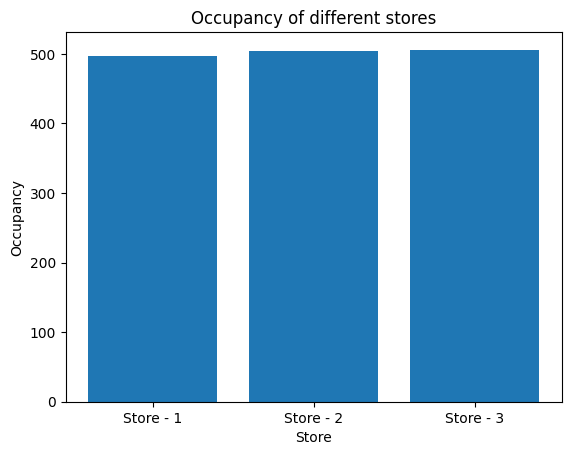

In [166]:
plt.title('Occupancy of different stores')

plt.xlabel('Store')
plt.ylabel('Occupancy')

plt.bar(['Store - 1', 'Store - 2', 'Store - 3'], listOfOccupancies)

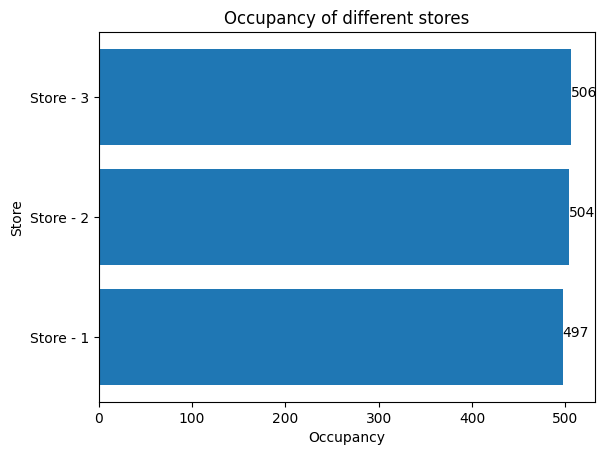

In [168]:
x = ['Store - 1', 'Store - 2', 'Store - 3']
y = listOfOccupancies

plt.title('Occupancy of different stores')

plt.xlabel('Occupancy')
plt.ylabel('Store')

plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index, str(value))

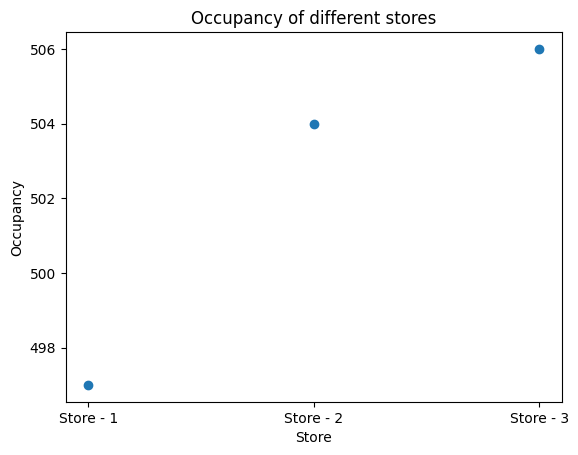

In [164]:
plt.title('Occupancy of different stores')

plt.xlabel('Store')
plt.label('Occupancy')

plt.scatter(['Store - 1', 'Store - 2', 'Store - 3'], listOfOccupancies)